My first notebook - 
Linear regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy, math
from sklearn import linear_model


X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# y = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + b


b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")



w_init shape: (4,), b_init type: <class 'float'>


In [8]:
def feature_scaling(X_train):
    scalar = []
    x = len(X_train[0])
    for i in range(x):
        scalar.append(max(X_train[:, i]))
    X_train = X_train / scalar
    return X_train

def compute_cost_func(w, X_train, b, y_train):
    m = X_train.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(w, X_train[i]) + b
        cost += (f_wb_i - y_train[i])**2
    cost = cost / (2 * m)
    return cost

def compute_grad(w, b, X_train, y_train):
    m = X_train.shape[0]
    d_w = 0
    d_b = 0
    for i in range(m):
        d_w = d_w + (np.dot(w, X_train[i]) + b - y_train[i]) * X_train[i]
        d_b = d_b + (np.dot(w, X_train[i]) + b - y_train[i])
    d_w /= m
    d_b /= m
    return d_w, d_b

def gradient_descent(X_train, y_train, w_init, b, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_init)
    for i in range(num_iters):
        d_w, d_b = compute_grad(w, b, X_train, y_train)

        w = w - alpha * d_w
        b = b - alpha * d_b

        J_history.append(compute_cost_func(w, X_train, b, y_train))
    return w, b, J_history



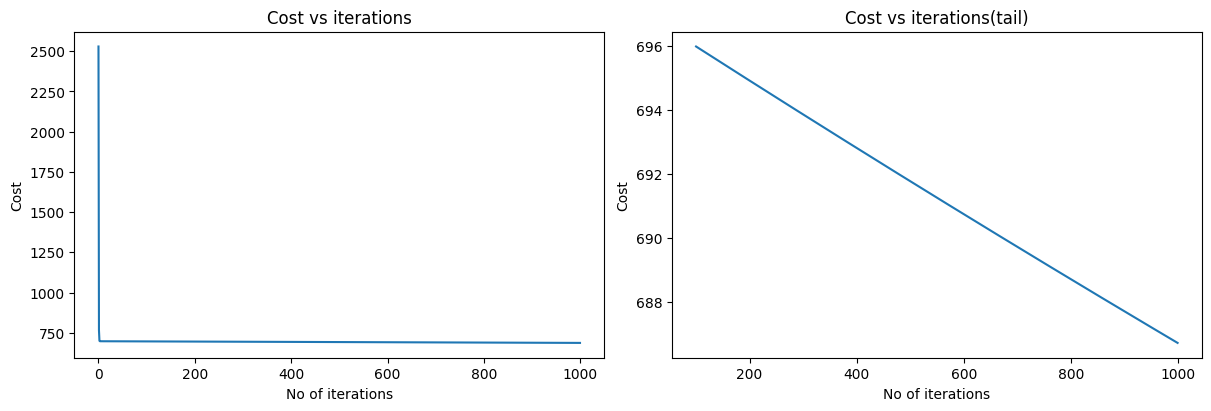

In [14]:
initial_w = np.zeros_like(w_init)
initial_b = 0
iterations = 1000
alpha = 5.0e-7

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize = (12, 4))
ax1.plot(np.arange(len(J_history)), J_history);                    ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs iterations");                               ax2.set_title("Cost vs iterations(tail)")
ax1.set_ylabel("Cost");                                            ax2.set_ylabel("Cost")
ax1.set_xlabel("No of iterations");                                ax2.set_xlabel("No of iterations")
plt.show()